In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt  # some imports to set up plotting

In [9]:
df = pd.read_csv("./flight_delays.csv")
data = df[(df['dep_delayed_15min'] == 'N')]

### Доля всех задержек ко всем вылетам

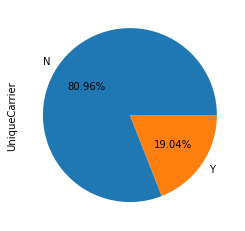

In [10]:
df.groupby('dep_delayed_15min')['UniqueCarrier'].count().plot(kind='pie', autopct='%1.2f%%')

### Зависимость количества задержек от длины пути, который предстоит пролететь самолёту

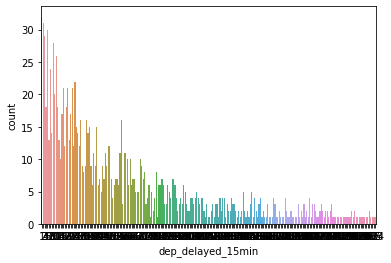

In [12]:
sns.countplot(data.groupby('Distance')['dep_delayed_15min'].count())

### Сгруппируем вылеты по расстоянию i <= Distance<= i+100

In [13]:
data['Distance'].max()

4962

In [15]:
Dist = [_ for _ in range(0, 5100, 100)]
Numbers = []
for i in range(len(Dist)-1):
    a = data[(data['Distance'] >= Dist[i])&(data['Distance'] <= Dist[i+1])]['dep_delayed_15min'].count()
    Numbers.append(a)
c = pd.DataFrame({'Count': Numbers}, index =Dist[1::])

Text(0, 0.5, 'Count')

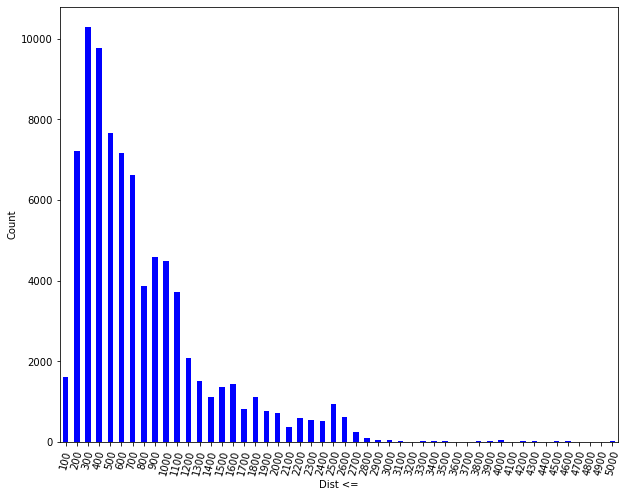

In [16]:
plt.figure(figsize=(10,8)) 
G = c['Count'].plot(kind='bar', rot=75, color='blue')
G.set_xlabel("Dist <=")
G.set_ylabel("Count")
#plt.ylim([19000, 21000])


### Зависимость количества задержек по месяцам

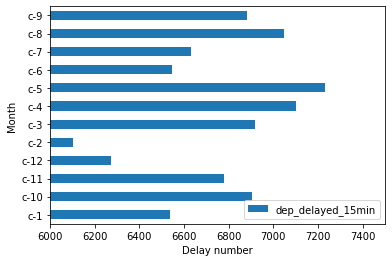

In [19]:
Delay_per_month = data.groupby('Month')['dep_delayed_15min'].count().plot(kind='barh')
plt.xlim([6000, 7500])
Delay_per_month.set_xlabel("Delay number")
Delay_per_month.legend()

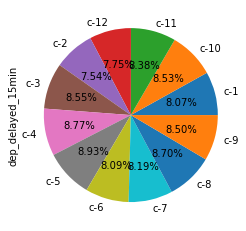

In [21]:
data.groupby('Month')['dep_delayed_15min'].count().plot(kind='pie', autopct='%1.2f%%')

### Топ 5 месяцев, в которые происходит задержка

(6000.0, 8000.0)

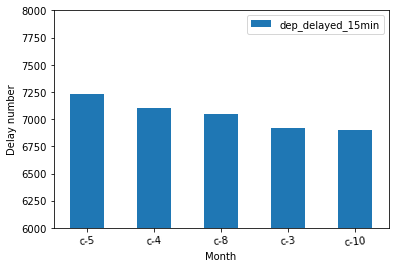

In [29]:
d1 = data.groupby('Month')['dep_delayed_15min'].count()
d1 = pd.DataFrame(d1).sort_values(by='dep_delayed_15min',ascending=False).head(5)

Smth_next = d1.plot(kind='bar', rot=5)
Smth_next.set_ylabel("Delay number")
plt.ylim([6000, 8000])

### Топ худших компаний

Text(0, 0.5, 'Delay number')

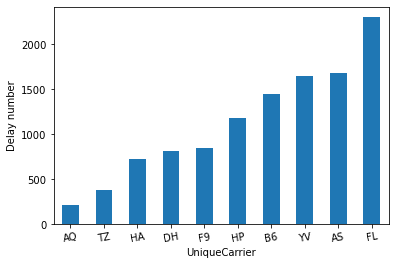

In [30]:
Smth_after = data.groupby('UniqueCarrier')['dep_delayed_15min'].count().sort_values(ascending=True).head(10)
Smth_after = Smth_after.plot(kind="bar", rot=10, fontsize=10)
Smth_after.set_ylabel("Delay number")

### Топ 10 аэропортов, на которые есть задержка

Text(0, 0.5, 'Delay number')

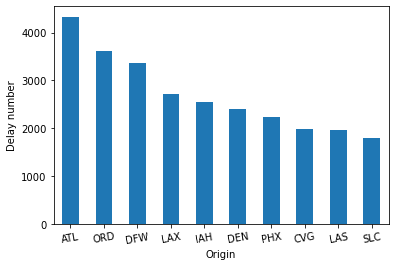

In [31]:
p1 = data.groupby('Origin')['dep_delayed_15min'].count().sort_values(ascending=False).head(10)
Smth_after_that = p1.plot(x="Origin", y="Delay", kind="bar", rot=10, fontsize=10)
Smth_after_that.set_ylabel("Delay number")
#по убыванию

### Топ 5 направлений, на которые есть задержка

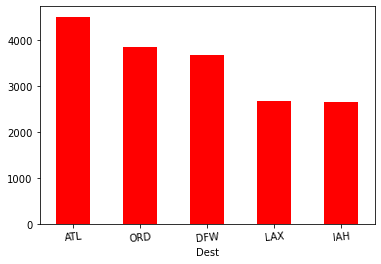

In [32]:
p11 = data.groupby('Dest')['dep_delayed_15min'].count().sort_values(ascending=False).head(5)
p11.plot(kind="bar", rot=5, fontsize=10, color = 'red')